<a href="https://colab.research.google.com/github/Manjunatha-kv/Voice-classification-using-ML/blob/main/Copy_of_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
%matplotlib inline
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc


In [ ]:
#EXTRACTING FEATURES OF AUDIO FILES ADD CONSTRUCTIONG DATA FRAME

In [ ]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [ ]:
file1=[]
filename=[]
filename_2=[]
path_2="/content/drive/MyDrive/Colab Notebooks/TESS Toronto emotional speech set data/"
path_1="/content/drive/MyDrive/Actor_01/"

for filename in os.listdir('/content/drive/MyDrive/Actor_01'):
    filename_2.append(filename)
    file1.append(path_1+filename)
for file in os.listdir(path_2):
  for sub_file in os.listdir(path_2+file):
    filename_2.append(sub_file)
    file1.append(path_2+file+'/'+sub_file)


In [ ]:
file = open('data_1.csv', 'w', newline='')
path="/content/drive/MyDrive/Actor_01/"
path_2="/content/drive/MyDrive/Colab Notebooks/TESS Toronto emotional speech set data/"
filenm=[]
count=0
i=0
with file:
            writer = csv.writer(file)
            writer.writerow(header)

for filename in file1:
        y, sr = librosa.load(filename, mono=True, duration=10)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
       # zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename_2[i]} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        asd=filename_2[i]
        abc=filename_2[i].strip(".wav")
        xyz=abc.split("_")
        if "neutral" in xyz or asd[7:8]=='1'  :
          to_append +=f' neutral'
        elif "calm" in xyz or asd[7:8]=='2':
          to_append +=f' calm '
        elif "happy" in xyz or asd[7:8]=='3' :
          to_append +=f' happy '
        elif "sad" in xyz or asd[7:8]=='4' :
          to_append +=f' sad '
        elif "angry" in xyz or asd[7:8]=='5' :
          to_append +=f' angry '
        elif "fear" in xyz or asd[7:8]=='6':
          to_append +=f' fearful '
        elif "disgust" in xyz or asd[7:8]=='7' :
          to_append +=f' disgust '
        elif "ps" in xyz or asd[7:8]=='8' :
          to_append +=f' surprised '
        file = open('data_1.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
        i=i+1
        

 

In [ ]:
#PROCESSING DATA SET

In [ ]:
data=pd.read_csv("data_1.csv")
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,03-01-03-02-01-01-18.wav,0.457922,0.035176,3157.591056,2511.869429,5900.626078,-415.069458,12.245625,-24.343225,-6.294127,...,-3.164639,0.843436,11.127857,10.850525,11.804453,3.411174,2.310365,-1.382095,2.370279,happy
1,03-01-03-02-02-02-18.wav,0.432160,0.036901,3327.047884,2495.639762,6039.155450,-410.735413,9.109993,-26.549261,-6.994276,...,-3.550658,-0.585956,8.879249,9.672291,13.380018,7.802460,3.285246,-2.514503,-0.920659,happy
2,03-01-03-02-02-01-18.wav,0.465760,0.025504,3411.453513,2461.752218,6119.591012,-462.823730,17.797123,-35.127300,-2.119096,...,-6.877151,0.494760,8.151483,4.681976,12.179905,7.391655,7.694186,-3.562937,-1.568760,happy
3,03-01-05-01-01-01-18.wav,0.505297,0.008793,3284.245079,2325.248597,5721.206430,-545.032471,47.990929,-23.263634,1.032519,...,-4.920440,-5.024282,-4.768774,-4.763103,-7.171529,-8.198336,-2.424730,-6.005722,-2.061668,angry
4,03-01-04-02-02-02-18.wav,0.425729,0.014160,3217.191583,2394.878235,5708.179740,-502.771454,31.302757,-27.754076,-5.126065,...,-12.864311,-0.139698,-1.961939,-5.195973,-0.551798,-4.636920,2.390254,2.300957,7.993421,sad


In [ ]:
data.shape

(6719, 27)

In [ ]:
data.isnull().sum()

filename              0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [ ]:
data.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,6719.000000,6719.000000,6719.000000,6719.000000,6719.000000,6719.000000,6719.000000,6719.000000,6719.000000,6719.000000,...,6719.000000,6719.000000,6719.000000,6719.000000,6719.000000,6719.000000,6719.000000,6719.000000,6719.000000,6719.000000
mean,0.336599,0.026609,2587.040935,2178.629866,4489.668317,-443.523945,59.777842,1.647446,11.601157,-4.547543,...,-12.089496,3.808774,-6.752335,4.850117,-3.099703,0.776974,-2.758053,4.177970,-4.573873,1.682790
std,0.083584,0.019353,553.463189,190.332396,949.617881,104.613071,21.756914,15.952627,14.194240,11.380459,...,5.895363,6.749823,4.848266,4.681262,4.470775,4.147995,3.425764,5.622815,4.334455,5.374338
min,0.195489,0.000350,1421.881378,1569.350765,2100.745739,-823.578247,-3.610389,-57.817307,-34.950268,-46.626053,...,-27.484154,-14.501750,-23.639904,-9.084607,-16.922167,-11.961260,-14.242366,-8.672729,-22.325613,-14.999321
25%,0.280843,0.012573,2129.021631,2048.187354,3717.642329,-505.126175,43.533331,-10.571188,1.316261,-11.823714,...,-16.163450,-1.470643,-9.609764,1.328235,-6.020448,-2.350781,-5.211625,-0.205411,-7.252473,-1.470021
50%,0.313695,0.021952,2563.362227,2154.711367,4535.119243,-422.836853,61.093403,-0.036183,11.227035,-4.231551,...,-12.406733,3.797206,-6.360465,4.952944,-2.967065,0.950924,-2.819669,2.829283,-4.228213,1.415036
75%,0.363060,0.035077,3008.280961,2273.548103,5287.087052,-372.735764,76.497879,14.232013,20.965846,3.015337,...,-8.685039,9.060374,-3.533087,8.530602,-0.276002,3.864387,-0.452965,8.462917,-1.629851,4.374425
max,0.632806,0.117052,4304.279455,2881.594820,6818.495375,-234.996597,120.843819,44.233646,54.733509,23.899275,...,11.552008,22.808260,17.395294,23.128473,14.890610,14.416389,11.299822,23.719131,16.246477,30.336109


In [ ]:
data.label.value_counts()

happy        972
angry        972
disgust      972
surprised    972
sad          971
neutral      888
fearful      773
calm         199
Name: label, dtype: int64

In [ ]:
data['label']=data['label'].replace(['neutral'],1)
data['label']=data['label'].replace(['calm'],2)
data['label']=data['label'].replace(['happy'],3)
data['label']=data['label'].replace(['sad'],4)
data['label']=data['label'].replace(['angry'],5)
data['label']=data['label'].replace(['fearful'],6)
data['label']=data['label'].replace(['disgust'],7)
data['label']=data['label'].replace(['surprised'],8)

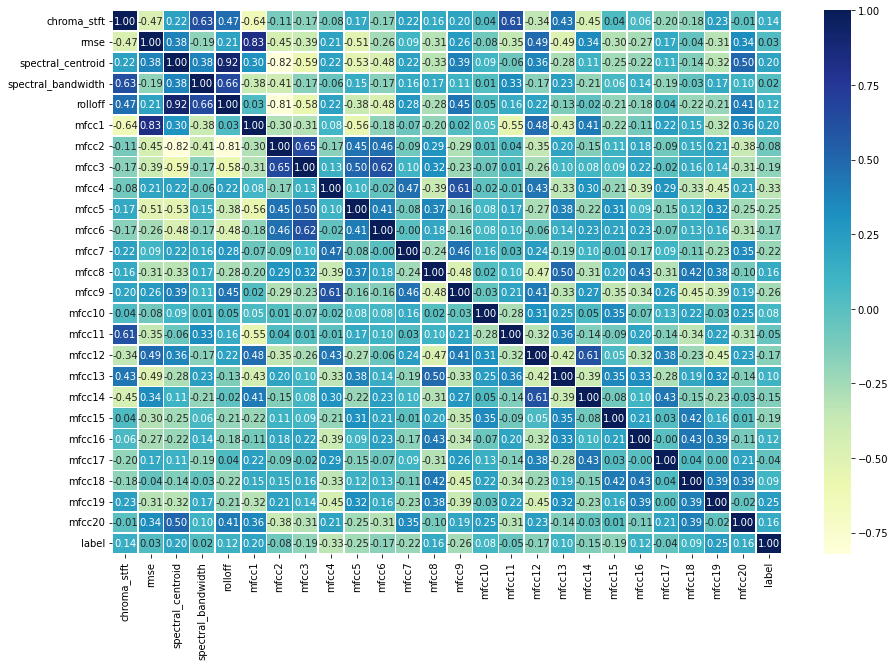

In [ ]:
corr_matrix=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt=".2f",
           cmap="YlGnBu")

In [ ]:
X = data.iloc[:,  1:-1]
y = data.loc[:,'label']

In [ ]:
#SPLITING DATA SET

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=3)

In [ ]:
svm_c = 1000
svm_gamma = 0.01

dtc_md = 4

rfc_M = 14
rfc_d = 8
rfc_m = 16

In [ ]:
#SUPPORT VECTOR MODEL

In [ ]:
model_acc=[]
from sklearn.svm import SVC
SVM_model = SVC(C=svm_c, gamma=svm_gamma).fit(X_train, y_train)
train_acc = SVM_model.score(X_train, y_train)
test_acc = SVM_model.score(X_test, y_test)
m = 'SVM'
model_acc.append([m, test_acc])

In [ ]:
#LOGISTICS REGRESSION MODEL

In [ ]:

from sklearn.linear_model import LogisticRegression 
logmodel = LogisticRegression(solver='liblinear')
train_acc=logmodel.fit(X_train,y_train)
test_acc=logmodel.score(X_test,y_test)
m = 'Logistic Regression'
model_acc.append([m, test_acc])

In [ ]:
# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20 )
train_acc=knn.fit(X_train,y_train)
test_acc=knn.score(X_test,y_test)
m = 'Knn Neighbours'
model_acc.append([m, test_acc])

In [ ]:
# NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB()
train_acc=nb.fit(X_train,y_train)
test_acc=nb.score(X_test,y_test)
m = 'Gaussian Classifiers'
model_acc.append([m,test_acc])


GaussianNB()

In [ ]:
#MLP CLASSIFIER

In [ ]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
train_acc=model.fit(X_train,y_train)
test_acc=model.score(X_test,y_test)
m = 'MLP Classifier'
model_acc.append([m, test_acc])
train_acc

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
#RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier(n_estimators=rfc_M, max_features=rfc_d, max_depth=rfc_m, random_state=2).fit(X_train, y_train)
train_acc = RFC_model.score(X_train, y_train)
test_acc = RFC_model.score(X_test, y_test)
m = 'Random Forest Classifier'
model_acc.append([m, test_acc])

In [ ]:
pred = RFC_model.predict(X_test)
pred

array([4, 1, 8, ..., 6, 1, 8])

In [ ]:
result = pd.DataFrame(model_acc, columns=['Model',  'Validation Accuracy'])
result[['Model','Validation Accuracy']]

,Model,Validation Accuracy
0,SVM,0.653274
1,Logistic Regression,0.775298
2,Knn Neighbours,0.497768
3,Gaussian Classifiers,0.713542
4,MLP Classifier,0.777530
5,Random Forest Classifier,0.877232
